# Response times


In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks", palette="pastel")

data = {
    "baseline (ms)": list(pd.read_csv("~/data/baseline.csv")['response-time'] * 1000), # (* 1000) converts secs to ms
    "graphql (ms)": list(pd.read_csv("~/data/graphql.csv")['response-time'] * 1000), # (* 1000) converts secs to ms
    "grpc (ms)": list(pd.read_csv("~/data/grpc.csv")['duration (ms)']), # time is in ms
    "grpc-gateway (ms)": list(pd.read_csv("~/data/grpc-gateway.csv")['response-time'] * 1000), # (* 1000) converts secs to ms
}
df = pd.DataFrame(data)

In [2]:
df.describe(percentiles=[0.5, 0.95, 0.99])

,baseline (ms),graphql (ms),grpc (ms),grpc-gateway (ms)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.406790,9.160150,9.403337,9.066910
std,4.768422,4.829998,5.518655,6.251547
min,0.300000,0.300000,0.620000,0.300000
50%,8.200000,8.800000,8.140000,8.000000
95%,16.500000,17.400000,20.620000,20.600000
99%,23.300000,23.600000,29.890300,30.100000
max,48.300000,56.800000,49.250000,72.400000


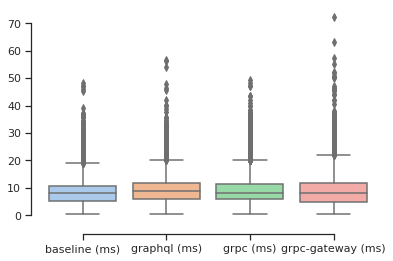

In [3]:
sns.boxplot(data=df)
sns.despine(offset=10, trim=True)

# Binary sizes

In [4]:
bin_sizes = pd.read_csv("~/data/bin-sizes.csv").sort_values(by="size (bytes)")
baseline = bin_sizes[bin_sizes["binary"] == "baseline"]["size (bytes)"][0]
bin_sizes["diff from baseline"] = bin_sizes["size (bytes)"] - baseline
bin_sizes

,binary,size (bytes),diff from baseline
0,baseline,7906070,0
2,graphql,11284186,3378116
3,grpcgateway,14292562,6386492
1,go-swagger,15063335,7157265


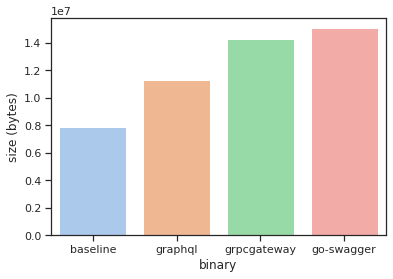

In [5]:
sns.barplot(y="size (bytes)", x="binary", data=bin_sizes)